# Experiment Results

## Setup(α,λ) 
In this section we describe our observations when attempting to choose appropriate parameters of the model
#### Parameters:
λ - Weight Decay    
α - Learning Rate

The table below describes our observations for **α**:
<table>
    <tr>
        <th style="width:10%;text-align:left"> Alpha (α) </th>
        <th style="width:10%;text-align:left"> Lambda (λ) </th>
        <th style="width:10%;text-align:left"> Epochs </th>
        <th style="width:70%;text-align:left"> Observations </th>
    </tr>
    <tr><td>1e-1</td><td>0</td><td>-</td><td style="text-align:left">Kept loss history and tracked the current and previous loss and stopped training when the difference was 0. The model was training for epochs as high as one hundred thousand (100,000). From analyzing the loss history, we saw that by epoch 2000 for small values of N, there was no real improvement in the loss.</td></tr>
    <tr><td>1e-2</td><td>0</td><td>2000</td><td style="text-align:left">The learning rate turned out to be too small and this led to underfitting of the training data i.e our training error *EIn* was still too large.</td></tr>
    <tr><td>1e-2</td><td>0</td><td>5000</td><td style="text-align:left">The learning rate was still too small and the model was still underfitting the training data</td></tr>
    <tr><td>2e-1</td><td>0</td><td>5000</td><td style="text-align:left">The learning rate was too large and the model was overfitting the training data. This led to very high testing error *EOut*</td></tr>
    <tr><td>1e-1</td><td>0</td><td>5000</td><td style="text-align:left">The learning rate seemed to appropriately fit the model. The training error was leass than 0.01 (except for sigma=1) and testing error remained below 2.0 (except for sigma=1)</td></tr>
</table>

When choosing **λ**, we experimented with the values 1e-5, -1e-5 and -2e-5. We chose -2e-5 because it showed the clearest difference in the estimated coefficients.

#### Final Parameters:
λ - Weight Decay : -2e-5      
α - Learning Rate : 1e-1

#### Experiments:
In running the experiment mini batched gradient descent was used. The batch size was half of the sample size and was shuffled to ensure that the same data points were not always used to calculate the gradient. 

## Read Results
We have three (3) files that hold the results of our experiments:
1. **./results/experiments_weight_decay_0** holds the result of our experiment where the weight decay (λ) is set to 0
2. **./results/experiments_weight_decay_-1e-05** holds the result of our experiment where the weight decay (λ) is set to -1e-5 
3. **./results/experiments_weight_decay_-2e-05** holds the result of our experiment where the weight decay (λ) is set to -2e-5

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [28]:
resultsNWD = './results/experiments_weight_decay_0'
resultsWD = './results/experiments_weight_decay_-1e-05'
resultsWD2 = './results/experiments_weight_decay_-2e-05'

In [3]:
NList = [2,5,10,20,50,100,200]
dList = np.arange(0,21)
sigmas = [0.01,0.1,1]

In [4]:
with open(resultsNWD, "r", encoding='utf-8') as nwd:
    experimentsNWD = eval(nwd.read())

In [5]:
with open(resultsWD, "r", encoding='utf-8') as wd:
    experimentsWD = eval(wd.read())

In [29]:
with open(resultsWD2, "r", encoding='utf-8') as wd2:
    experimentsWD2 = eval(wd2.read())

## Process Experiment Results
The first part of this section reads the data from the experiments and sums them in dictionaries for the different values of N, d and sigma. 

The second part normalizes the data in corresponding dictionaries for the results with weight decay and those without. This allows us to be able to compare the differences on the same scale

In [7]:
def evalExperiment(experiments):
    dictN, dictD, dictSigma = dict(),dict(),dict()
    for result in experiments:
        n, d, s = result[0], result[1], result[2]
        if n in dictN :
            dictN[n] += np.array(result[3:6])
        else :
            dictN[n] = np.array(result[3:6])

        if d in dictD:
            dictD[d] += np.array(result[3:6])
        else :
            dictD[d] = np.array(result[3:6])


        if s in dictSigma:
            dictSigma[s] += np.array(result[3:6])
        else :
            dictSigma[s] = np.array(result[3:6])
    return dictN,dictD,dictSigma


In [19]:
def normalizeDict(dictX,dictY,dictZ):
    dictX = {k: x/(441/len(dictX)) for k, x in dictX.items()}
    dictY = {k: x/(441/len(dictY)) for k, x in dictY.items()}
    dictZ = {k: x/(441/len(dictZ)) for k, x in dictZ.items()}
    return dictX,dictY,dictZ

In [49]:
dictSigma

{0.01: array([0.05308288, 0.54065686, 0.19982981]),
 0.1: array([0.06087047, 0.56471082, 0.2060895 ]),
 1: array([0.73882033, 4.01885901, 1.23672139])}

## Plot Result Graph
In this section, we plot the graphs which we use to compare our experiment results for *Weight Decay (λ) = 0* and *Weight Decay (λ) = -2e-5*.

In [42]:
# dicts contains the 6 dictionaries showing the mapping of the params to EIn, EOut and EBias
def plotResults(dicts, title):
    fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(20,5))
    fig.suptitle(title, fontsize=20)
    
    params = [NList,dList,sigmas]
    colors = ['r','g','b']
    labels = ['EIn','EOut','Ebias']
    ylims = [6,5,4]
    xLabels = ['Sample Size - N', 'Polynomial Degrees - d', 'Sigma - s']
    
    for i,ax in enumerate(axes.flat):
        X = params[i]
        dictX = dicts[i]
        
        ''' 
        Y contains the error values for each value in X
        For example : If X is NList - [2,5,10,20,50,100,200], then Y contains 3 rows where
        row 1 : is the EIn value for each value for NList - i.e eIn for 2,5,etc
        row 2 : is the EOut value for each value for NList - i.e eOut for 2,5,etc
        row 3 : is the EBias value for each value for NList - i.e eBias for 2,5,etc
        '''
        for j in range(3):
            Y = [dictX[k][j] for k in X]
            ax.plot(X,Y,color=colors[j])
            
        ax.set(xlabel=xLabels[i])
        ax.set_ylim([0,ylims[i]])
    
    fig.legend(labels=labels,loc="upper right")
    plt.show()
    

## Results
The following results show the fitting and generalization of our model as relates to sample size (N), model complexity (d), and sigma (σ). We also include comparisons of our model with zero weight decay and two negative weight decay values.

We start by showing sample distributions for sample size (N) = 100 and the different values of sigma (σ) </p>

<table>
    <tr>
        <td>σ = 0.01 <img src="./sig0.01.png" alt="drawing" width="250"/></td>
        <td>σ = 0.1<img src="./sig0.1.png" alt="drawing" width="250"/></td>
        <td>σ = 1<img src="./sig1.png" alt="drawing" width="250"/></td>
    </tr>
</table>

**From the plot above we can see that as sigma increases, so does the noise in the data. At sigma(σ) = 1, the shape of the function (cosine) is unrecognizable.**

### Description
In the graphs below, we plot our results from values in the files mentioned earlier. For each value of weight decay, we plot 3 graphs. 

The first graph averages all values of EIn, EOut and EBias over individual values of the **Sample Size (N)**. That is for each value of **N in [2,5,10,20,50,100,200]**, we add the values of EIn, EOut and EBias and divide the sums by the value we get we divide the number of combinations by all possible sample sizes. In this case, this is 63 because we have 441 combinations and 7 values in N.

***441 combinations because we run experiments for each value of N across each value of d across each value of sigma : 7 * 21 * 3 = 441***

The second graph averages all values of EIn, EOut and EBias over individual values of the **Model Complexity (i.e Polynomial Degree) (d)**. The same calculation as N applies here except we divide by 21 because there are 21 possible values in d **[0 to 20]**.

The third graph averages all values of EIn, EOut and EBias over individual values of the noise variable **Sigma (σ)**. The same calculation as N applies here except we divide by 147 because there are 3 possible values in σ **[0.01,0.1,1]**.

**The graphs maintain the same y axis limit across the weight decay comparisons to ensure the scales are the same**

### Observations 
For small values of sample size (N) and large values of sigma (σ), the testing error (EOut) is quite large. This is due to the combined fact that there is insufficient training data and  a significant amount of noise in our training data. The model is unable to appropriately learn coefficients to fit the underlying function and therefore the estimated coefficients are not able to generalize to unseen data. Also, with such a small sample size, the model seems to overfit the training data resulting in a training error (EIn) very close to zero. We see that as the sample size (N) increases, the values of EIn, EOut and EBias merge and become almost equal. This leads to the conclusion that having more training samples is highly beneficial to the generalization of a model.

The averaged coefficients over all experiement trials produce an error (EBias) that is close to the training error (EIn) even with large testing error (EOut). As the degree (d) of the polynomial increases, the training error (EIn) and the averaged polynomial error (EOut) plateau and remain close to zero. But the testing error (EOut) does not. This can be attributed to the fact that as the model complexity is inversely proportional to its ability to generalize to unseen data. That is, as a model becomes more complex, it overfits the training data which results in high testing errors (EOut).

For each value of sigma (σ), we can see the progress of EIn, EOut and EBias. From the figures above, we can see that σ = 0.01 represents the smallest amount of noise in the data and there it makes sense that there is little difference between EIn, EOut and EBias at this value. As sigma (σ) increases however, the error gap grows quite large. This growth affects the values of EBias and pulls it away from the training error (EIn). At σ = 1, it is no surprise that the test error (EOut) is considerably large. The model seems unable to estimate coefficients that generalize to unseen data.

### Weight Decay 
Regularization is meant to balance out the training and test errors. This works by adding a weight decay to the loss function which "weighs" on the learned coefficients. In carrying out the experiments, it was observed that a negative weight decay parameter has a better effect on the model. This appears to be becuase the coefficients were pulled down by the negative weight when computing the gradient with regularization.

Applying weight decay to the loss function, in this case the mean squared error, seems to result in a reduced testing error (EOut). The learning rate was kept constant (i.e it did not adapt to the model during training). From the graphs below we can see a reduced gap between the training error (EIn) and the testing error (EOut) which means that the learned model is able to generalize better to unseen data. We also see that as the model becomes more complex, the testing error (EOut) begins to rise as expected.

Comparing the graphs with weight decay against those without, we can see a much smoother testing error (EOut) and a close in the generalization gap i.e the gap between EIn and EOut.

In [30]:
dictN, dictD, dictSigma = evalExperiment(experimentsNWD)
dictNWD, dictDWD, dictSigmaWD = evalExperiment(experimentsWD)
dictNWD2, dictDWD2, dictSigmaWD2 = evalExperiment(experimentsWD2)

In [31]:
dictN,dictNWD,dictNWD2 = normalizeDict(dictN,dictNWD,dictNWD2)
dictD,dictDWD,dictDWD2 = normalizeDict(dictD,dictDWD,dictDWD2)
dictSigma,dictSigmaWD,dictSigmaWD2 = normalizeDict(dictSigma,dictSigmaWD,dictSigmaWD2)

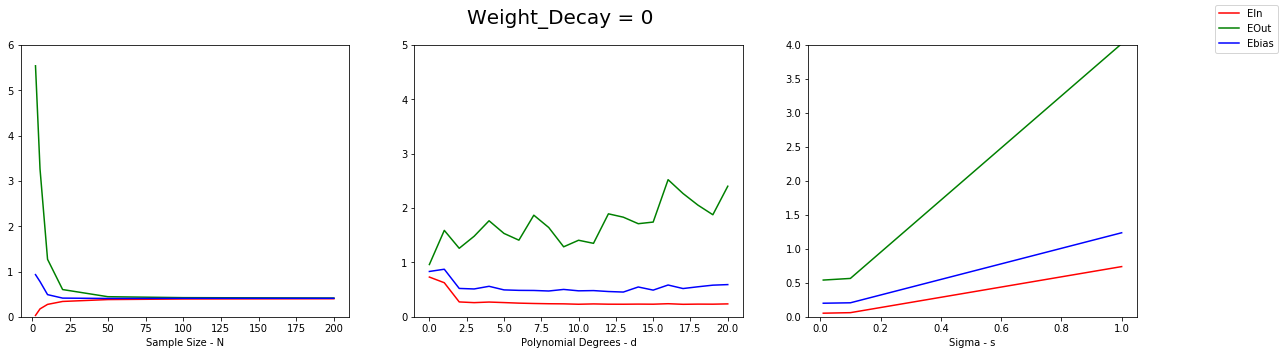

In [43]:
dicts = [dictN,dictD,dictSigma]
plotResults(dicts, 'Weight_Decay = 0')

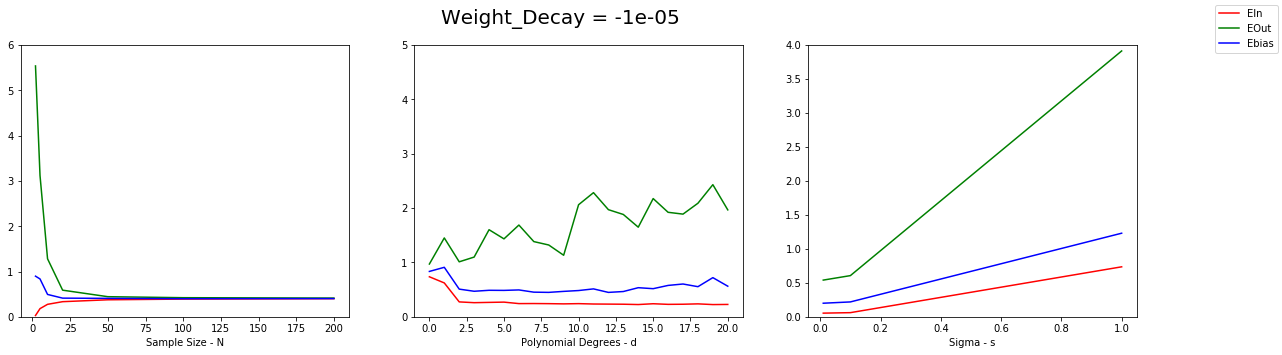

In [44]:
dicts1 = [dictNWD,dictDWD,dictSigmaWD]
plotResults(dicts1, 'Weight_Decay = -1e-05')

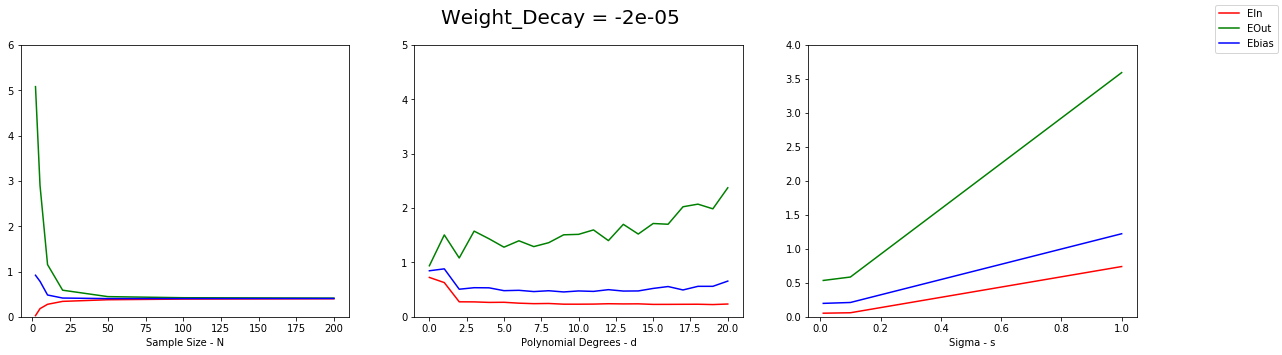

In [45]:
dicts2 = [dictNWD2,dictDWD2,dictSigmaWD2]
plotResults(dicts2, 'Weight_Decay = -2e-05')